Experiment 5.1:
Objective:
To forecast future values of a univariate time series using LSTM-based models.

Expected Outcome:
Prediction vs actual plot
RMSE/MAE values

In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/airline-passengers.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             144 non-null    object
 1   total_passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


(None,
      month  total_passengers
 0  1949-01               112
 1  1949-02               118
 2  1949-03               132
 3  1949-04               129
 4  1949-05               121)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


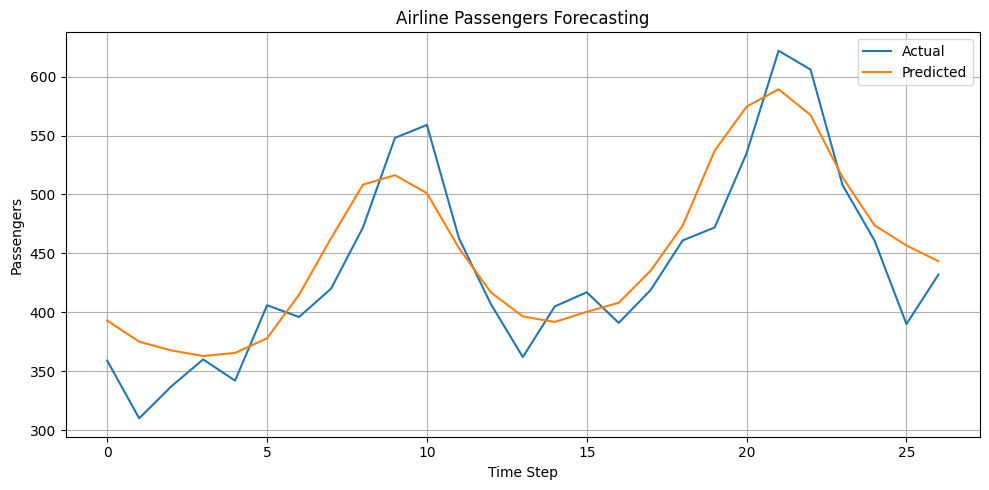

(np.float64(33.99949071393324), 28.663352683738427)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Convert month column to datetime
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

# Normalize the passenger data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['total_passengers']])

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 12
X, y = create_sequences(scaled_data, SEQ_LEN)

# Split data into training and test sets (e.g., 80/20 split)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Airline Passengers Forecasting")
plt.xlabel("Time Step")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

rmse, mae


Experiment 5.2: Sequence Text Prediction using LSTM
 Objective:
To generate next characters/words based on a given input sequence using LSTM.

Expected Outcome:
Auto-generated text samples
Training accuracy/loss plots

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


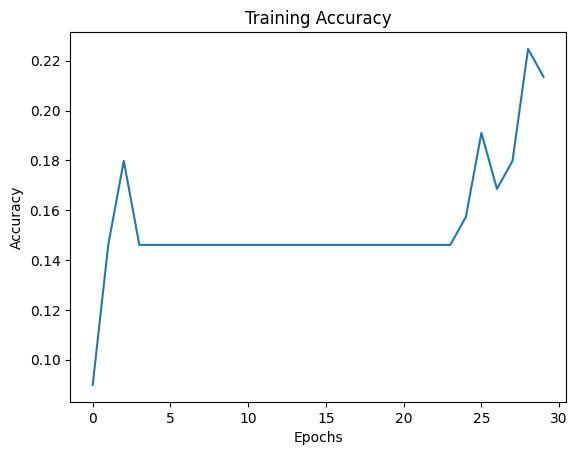

Generated Text:
 to be, or not to be          ooooouuuueeeeee   n   oooooouuueeeee te    n   oooooouurreee te   ooooouueree te    n   oo


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Sample text (Shakespeare snippet for demo purposes)
text = """To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,"""

# Convert text to lowercase
text = text.lower()

# Create a character-to-index mapping
chars = sorted(list(set(text)))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for i, c in enumerate(chars)}

# Convert the entire text into integer sequences
sequence = [char2idx[c] for c in text]

# Prepare input-output pairs
seq_length = 40
X = []
y = []
for i in range(len(sequence) - seq_length):
    X.append(sequence[i:i+seq_length])
    y.append(sequence[i+seq_length])

X = np.array(X)
y = to_categorical(y, num_classes=len(chars))

# Build the model
model = Sequential([
    Embedding(len(chars), 50, input_length=seq_length),
    LSTM(128, return_sequences=False),
    Dense(len(chars), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=30, verbose=0)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Function to generate text
def generate_text(seed_text, length=100):
    generated = seed_text.lower()
    for _ in range(length):
        input_seq = [char2idx[c] for c in generated[-seq_length:]]
        input_seq = np.pad(input_seq, (seq_length - len(input_seq), 0))
        input_seq = np.array(input_seq).reshape(1, seq_length)
        predicted = model.predict(input_seq, verbose=0)
        next_char = idx2char[np.argmax(predicted)]
        generated += next_char
    return generated

# Generate text from seed
seed = "to be, or not to be"
print("Generated Text:\n", generate_text(seed))


Experiment 5.3: Sequence Text Classification using LSTM
 Objective:
To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).

Expected Outcome:
Classification metrics: accuracy, precision, F1-score
Confusion matrix visualization

In [6]:
import pandas as pd

# Load the uploaded dataset
file_path = "/content/spam.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows and column names
df.head(), df.columns


(     v1                                                 v2 Unnamed: 2  \
 0   ham  Go until jurong point, crazy.. Available only ...        NaN   
 1   ham                      Ok lar... Joking wif u oni...        NaN   
 2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
 3   ham  U dun say so early hor... U c already then say...        NaN   
 4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
 
   Unnamed: 3 Unnamed: 4  
 0        NaN        NaN  
 1        NaN        NaN  
 2        NaN        NaN  
 3        NaN        NaN  
 4        NaN        NaN  ,
 Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object'))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.8597 - loss: 0.4581 - val_accuracy: 0.8621 - val_loss: 0.4016
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.8695 - loss: 0.3956 - val_accuracy: 0.8621 - val_loss: 0.4036
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.8699 - loss: 0.3947 - val_accuracy: 0.8621 - val_loss: 0.4022
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8738 - loss: 0.3835 - val_accuracy: 0.8621 - val_loss: 0.4104
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8732 - loss: 0.3887 - val_accuracy: 0.8621 - val_loss: 0.4069
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


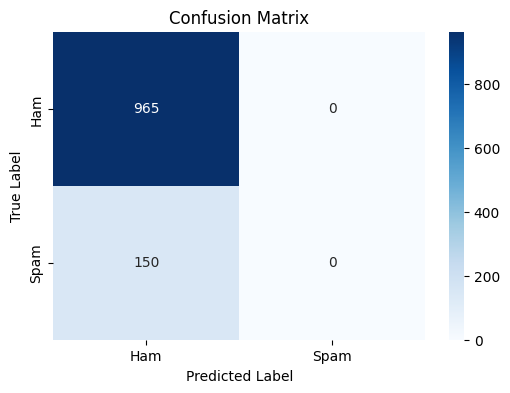

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Prepare data
X = df['message']
y = df['label']

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequences, maxlen=100, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

# LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Classification metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
